In [2]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [4]:
from data import Dataloader
from models import *
from metric import PairsExplained

In [5]:
# Loading the data
data_loader = Dataloader("../data/dataset_4") # Specify path to the dataset you want to load
X, Y = data_loader.load()
X=X[:1000]
Y=Y[:1000]


In [4]:
Y[1]

array([0.77086066, 0.94477142, 0.82162636, 0.0327517 ])

In [6]:
# Let's train an example model
parameters = {"n_pieces": 5, "n_clusters" :2} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y) # Training of the model, using preference data

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Set parameter TimeLimit to value 300
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5042 rows, 6040 columns and 71172 nonzeros
Model fingerprint: 0x406583e9
Variable types: 4040 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-04, 2e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e+00]
Presolve removed 16 rows and 2008 columns
Presolve time: 0.20s
Presolved: 5026 rows, 4032 columns, 56088 nonzeros
Variable types: 2032 continuous, 2000 integer (2000 binary)
Found heuristic solution: objective 104.0444944

Root relaxation: objective 0.000000e+00, 3036 iterations, 0.41 seconds (0.37 work units)


In [7]:
print(model.weights)

AttributeError: 'TwoClustersMIP' object has no attribute 'weights'

In [7]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[ 0.1738829   0.1738829 ]
 [ 0.07063033  0.07063033]
 [ 0.15828799  0.15828799]
 [-0.06178875 -0.06178875]
 [ 0.07461657  0.07461657]]


In [8]:
for k in range(2):
    for i in range(4):
        for l in range(5):
            print(f'u_{k}_{i}_{l}={model.model.getVarByName(f"u_{k}_{i}_{l}").x}"')

u_0_0_0=0.0"
u_0_0_1=0.0"
u_0_0_2=0.0"
u_0_0_3=0.0"
u_0_0_4=0.0"
u_0_1_0=0.0"
u_0_1_1=0.3983861859003117"
u_0_1_2=0.399698423197089"
u_0_1_3=0.399698423197089"
u_0_1_4=0.3998909225869579"
u_0_2_0=0.0"
u_0_2_1=0.1741011993730862"
u_0_2_2=0.5980512760775161"
u_0_2_3=0.5982401531408436"
u_0_2_4=0.6001090774130421"
u_0_3_0=0.0"
u_0_3_1=0.0"
u_0_3_2=0.0"
u_0_3_3=0.0"
u_0_3_4=0.0"
u_1_0_0=0.0"
u_1_0_1=0.179902012541464"
u_1_0_2=0.2628116400639082"
u_1_0_3=0.2735016139461312"
u_1_0_4=0.2735016139461312"
u_1_1_0=0.0"
u_1_1_1=0.0"
u_1_1_2=0.0"
u_1_1_3=0.0"
u_1_1_4=0.0"
u_1_2_0=0.0"
u_1_2_1=0.297464611101489"
u_1_2_2=0.297464611101489"
u_1_2_3=0.39893605554968026"
u_1_2_4=0.39893605554968026"
u_1_3_0=0.0"
u_1_3_1=0.1870726422533795"
u_1_3_2=0.20572912096570897"
u_1_3_3=0.24281389649900145"
u_1_3_4=0.3275623305041886"


In [18]:
print(model.predict_utility(X[:10]))
print(model.predict_utility(Y[:10]))

[[0.92621569 0.92621569]
 [0.76732166 0.76732166]
 [0.71013866 0.71013866]
 [0.73079017 0.73079017]
 [0.50176559 0.50176559]
 [0.75464043 0.75464043]
 [0.84317066 0.84317066]
 [0.67641457 0.67641457]
 [0.82713972 0.82713972]
 [0.71273277 0.71273277]]
[[0.75233279 0.75233279]
 [0.69669133 0.69669133]
 [0.55185067 0.55185067]
 [0.79257892 0.79257892]
 [0.42714902 0.42714902]
 [0.75474257 0.75474257]
 [0.97402629 0.97402629]
 [0.95795978 0.95795978]
 [0.56206979 0.56206979]
 [0.60962077 0.60962077]]


In [17]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:10]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [10]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X, Y)[:1000] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", 100*np.sum(pairs_explained) / 1000) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 48.7


In [11]:
# Or we call directly the right metric:
pairs_explained = PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X), model.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.513
Percentage of explained preferences for all samples: 0.513


In [13]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X, Y)[:20]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
# We can see how it compares to our model's predictions:
print(Z[:5])

[0 0 0 1 0]


In [11]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X, Y, Z))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12572\2909280323.py", line 2, in <module>
    cluster_intersection = metrics.ClusterIntersection()
AttributeError: module 'metrics' has no attribute 'ClusterIntersection'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Martin\AppData\Local\Progr

ValueError: 'c' argument has 2000 elements, which is inconsistent with 'x' and 'y' with size 500.

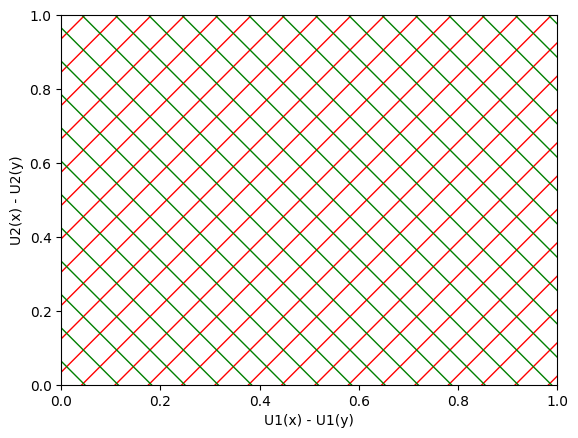

In [16]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [4]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

parameters = {"n_pieces": 5, "n_clusters" :2} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)

# Uncomment once your model is working
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 10018 rows, 12040 columns and 142352 nonzeros
Model fingerprint: 0xcca9fa12
Variable types: 8040 continuous, 4000 integer (4000 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 6014 rows and 8024 columns
Presolve time: 0.32s
Presolved: 4004 rows, 4016 columns, 50168 nonzeros
Variable types: 4016 continuous, 0 integer (0 binary)

Root relaxation: objective 5.118996e+01, 1283 iterations, 0.42 seconds (0.46 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl

NameError: name 'pairs_explained' is not defined

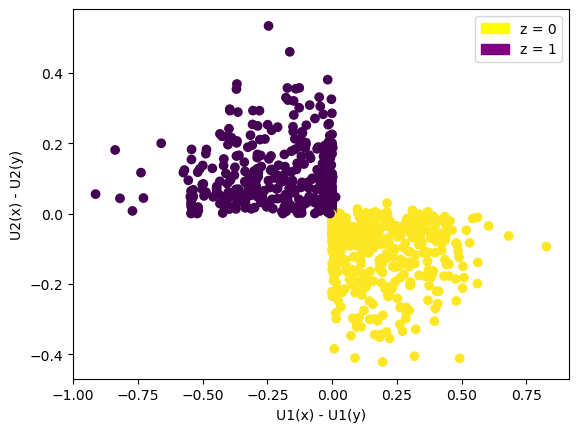

In [14]:
# As an example here are the results obtained with:
""" # Uncomment the code to check your results
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()
"""
# Here is how it should look like
from IPython.display import Image
Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.